In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from keras.utils import to_categorical

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# Preprocess data
X = X / 255.

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=10000, random_state=42)

# Define the classifiers
classifiers = {
    "MLP": MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Train classifiers and print metrics
for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"F1-score for {name}: {f1_score(y_test, y_pred, average='macro')}")
    print(f"Confusion matrix for {name}:\n{confusion_matrix(y_test, y_pred)}\n")



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Training MLP...
Iteration 1, loss = 0.31505518
Iteration 2, loss = 0.15346590
Iteration 3, loss = 0.11489697
Iteration 4, loss = 0.09334912
Iteration 5, loss = 0.07912536
Iteration 6, loss = 0.06868821
Iteration 7, loss = 0.06057312
Iteration 8, loss = 0.05476300
Iteration 9, loss = 0.05000436
Iteration 10, loss = 0.04447878
Iteration 11, loss = 0.04094104
Iteration 12, loss = 0.03597048
Iteration 13, loss = 0.03304921
Iteration 14, loss = 0.03086233
Iteration 15, loss = 0.02782031
Iteration 16, loss = 0.02536397
Iteration 17, loss = 0.02298024
Iteration 18, loss = 0.02239638
Iteration 19, loss = 0.01898879
Iteration 20, loss = 0.01701103
F1-score for MLP: 0.9739890634285391


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion matrix for MLP:
[[ 978    0    0    1    2    1    2    0    1    1]
 [   0 1115    1    1    2    1    1    2    2    0]
 [   3    2  970    2    6    1    0    8    4    3]
 [   1    3    7  978    1   15    0    5    8    2]
 [   0    0    3    1  956    0    2    1    1   11]
 [   4    1    1    2    3  880    4    1    2    4]
 [   7    0    1    0    4    2  968    0    0    0]
 [   2    3    5    1    9    1    0 1006    3   12]
 [   5    2    4    7    0    3    3    1  938   12]
 [   0    2    0    3   19    6    0    7    4  953]]

Training Random Forest...
F1-score for Random Forest: 0.967761618481625
Confusion matrix for Random Forest:
[[ 975    1    1    1    1    0    2    0    4    1]
 [   0 1107    5    4    1    4    1    2    1    0]
 [   5    2  971    4    5    0    2    6    4    0]
 [   1    0   14  970    0   11    2    8   13    1]
 [   1    0    1    0  945    0    5    0    2   21]
 [   4    0    2   12    2  864    8    2    3    5]
 [   5    0    0

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3475 - accuracy: 0.9001
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1753 - accuracy: 0.9486
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1373 - accuracy: 0.9592
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1161 - accuracy: 0.9649
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1008 - accuracy: 0.9695
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0901 - accuracy: 0.9730
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0820 - accuracy: 0.9747
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0756 - accuracy: 0.9764
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0687 - accuracy: 0.9786
Epoch 10/10
313/313 [==============================] - 0s 1ms/step


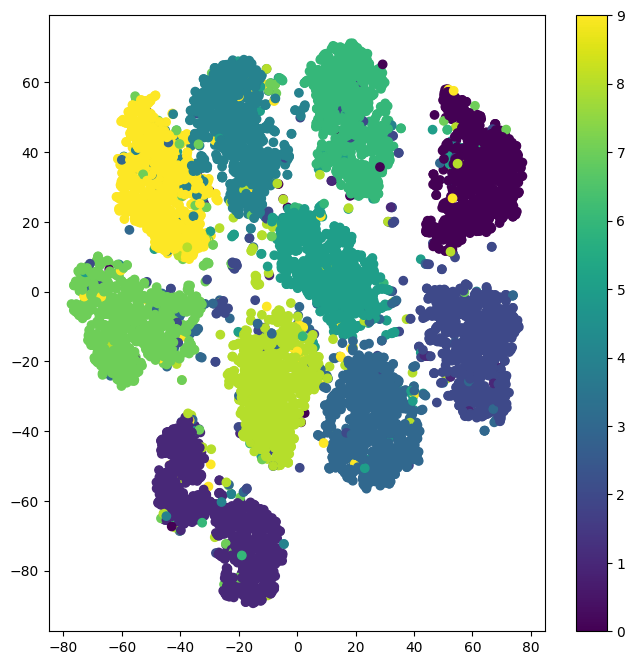

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# Preprocess data
X = X / 255.
y = to_categorical(y)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=10000, random_state=42)

# Define the MLP model
inputs = Input(shape=(784,))
x = Dense(30, activation='relu')(inputs)
x = Dense(20, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Define a new model that outputs the second layer
layer_output_model = Model(inputs=model.input, outputs=model.layers[1].output)

# Use the new model to predict on the test set
layer_output = layer_output_model.predict(X_test)

# Use t-SNE to reduce dimensionality for visualization
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(layer_output)

# Plot the t-SNE results
plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=np.argmax(y_test, axis=1), cmap='viridis')
plt.colorbar()
plt.show()


Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.5790 - accuracy: 0.8011
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4210 - accuracy: 0.8504
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3837 - accuracy: 0.8630
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3631 - accuracy: 0.8696
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3453 - accuracy: 0.8753
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3315 - accuracy: 0.8795
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3215 - accuracy: 0.8828
Epoch 8/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3139 - accuracy: 0.8848
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3035 - accuracy: 0.8888
Epoch 10/10
313/313 [==============================] - 0s 1ms/step


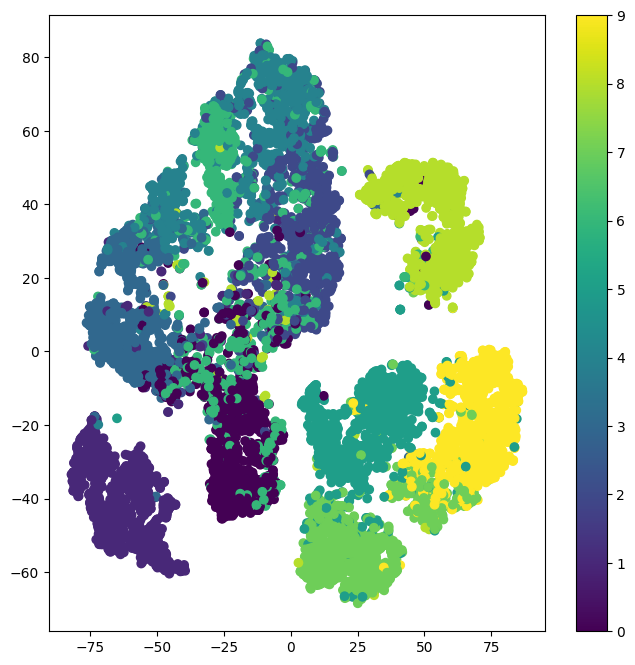

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist

# Load the Fashion-MNIST dataset
(X, y), _ = fashion_mnist.load_data()

# Flatten the images
X = X.reshape((X.shape[0], -1))

# Preprocess data
X = X / 255.
y = to_categorical(y)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=10000, random_state=42)

# Define the MLP model
inputs = Input(shape=(784,))
x = Dense(30, activation='relu')(inputs)
x = Dense(20, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Define a new model that outputs the second layer
layer_output_model = Model(inputs=model.input, outputs=model.layers[1].output)

# Use the new model to predict on the test set
layer_output = layer_output_model.predict(X_test)

# Use t-SNE to reduce dimensionality for visualization
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(layer_output)

# Plot the t-SNE results
plt.figure(figsize=(8,8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=np.argmax(y_test, axis=1), cmap='viridis')
plt.colorbar()
plt.show()
